# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')
%matplotlib inline

# Import airfoils data

In [2]:
df = pd.read_csv('AirfoilsCluster.csv')
df.head()

,Airfoils,t0.75c,Cd,Cl/Cd,cluster
0,NACA 63A010,0.05090,0.01236,40.453074,2
1,NACA 63012A,0.06052,0.01244,40.192926,2
2,NACA 63-015A,0.07462,0.01364,36.656892,2
3,NACA 63-210,0.04332,0.01117,44.762757,0
4,NACA 63-212,0.05112,0.01127,44.365572,0


# Calculate statistics

In [3]:
df.describe()

,t0.75c,Cd,Cl/Cd,cluster
count,194.000000,194.000000,194.000000,194.000000
mean,0.069950,0.013306,38.808295,1.036082
std,0.022935,0.002583,6.580826,0.847879
min,0.025972,0.009300,19.888624,0.000000
25%,0.053413,0.011362,34.435458,0.000000
50%,0.065243,0.012780,39.123631,1.000000
75%,0.080600,0.014520,44.004407,2.000000
max,0.135580,0.025140,53.763441,2.000000


# Data visualization

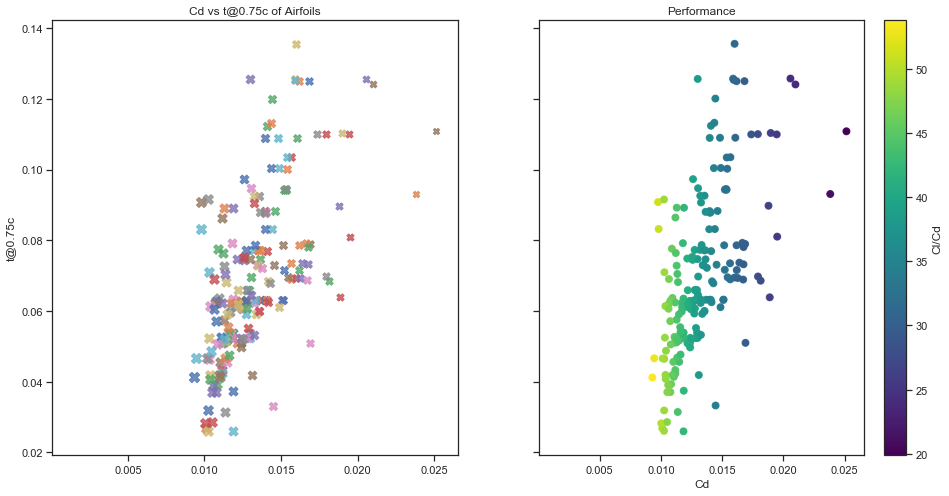

In [4]:
n=8
fig, f= plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(2*n,1*n))

for i in range(len(df)):
    f[0].scatter(df['Cd'][i], df['t0.75c'][i], s=df['Cl/Cd'][i]*2, marker='X', alpha=0.8)

f[0].set_title('Cd vs t@0.75c of Airfoils')
f[0].set_ylabel('t@0.75c')    
    
f[1].scatter(df['Cd'], df['t0.75c'], c=df['Cl/Cd'], s=50, cmap='viridis', alpha=0.7)
f[1].set_xlabel('Cd')
f[1].set_title('Performance')
ax = f[1]

performance = ax.scatter(df['Cd'], df['t0.75c'], c=df['Cl/Cd'], cmap='viridis')
cb = fig.colorbar(performance, ax=ax)
cb.set_label('Cl/Cd')

plt.show()

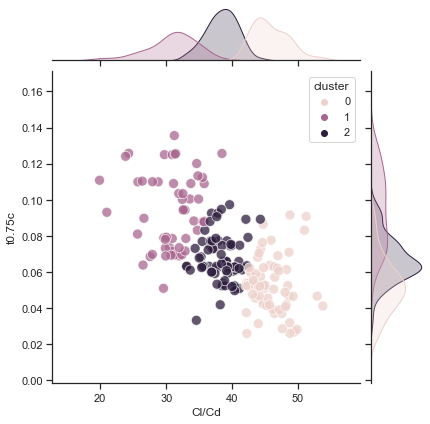

In [5]:
graph1 = sns.jointplot(x=df['Cl/Cd'], y=df['t0.75c'], s=100, hue=df['cluster'], alpha=0.75)
graph1.savefig("jointplots.png")

# Hypothesis Part

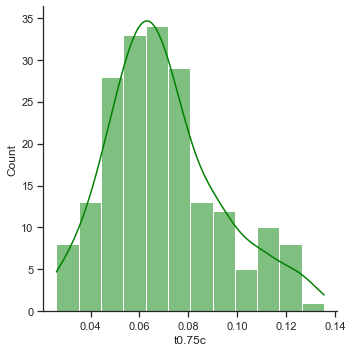

In [6]:
dis = sns.displot(df['t0.75c'], kde=True, color='green')

In [7]:
t = pd.read_csv('airfoil_cluster_1.csv')
t.head()

,Airfoils,t0.75c,Cd,Cl/Cd,cluster
0,NACA 66-021,0.12502,0.01682,29.726516,1
1,NACA 63(4)-221,0.08318,0.01440,34.722222,1
2,NACA 64(4)-221,0.08830,0.01462,34.199726,1
3,NACA 64(4)-421,0.08826,0.01397,35.790981,1
4,NACA 65(3)-218,0.08790,0.01405,35.587189,1


In [8]:
t.describe()

,t0.75c,Cd,Cl/Cd,cluster
count,55.000000,55.000000,55.000000,55.0
mean,0.094136,0.016465,30.878222,1.0
std,0.020716,0.002334,3.746153,0.0
min,0.051000,0.013000,19.888624,1.0
25%,0.075886,0.015185,29.612105,1.0
50%,0.094310,0.016000,31.250000,1.0
75%,0.109990,0.016885,32.927320,1.0
max,0.135580,0.025140,38.461538,1.0


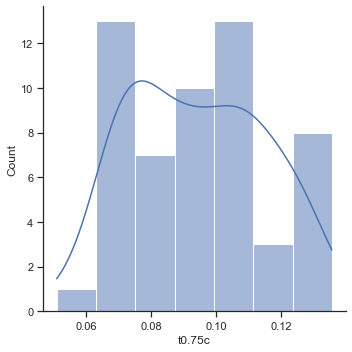

In [9]:
sns.displot(t['t0.75c'], kde=True)

In [10]:
num_mean = t['t0.75c'].count() - t[t['t0.75c'] < 0.075886].count() - t[t['t0.75c'] > 0.109990 + 0.020716].count()
print(num_mean)

Airfoils    40
t0.75c      40
Cd          40
Cl/Cd       40
cluster     40
dtype: int64


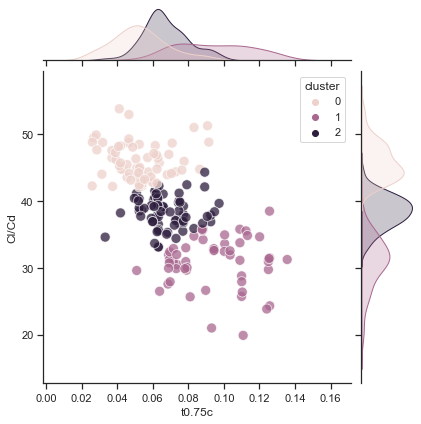

In [11]:
graph2 = sns.jointplot(x=df['t0.75c'], y=df['Cl/Cd'], s=100, hue=df['cluster'], alpha=0.75)
graph2.savefig("jointplots.png")

In [12]:
st = pd.read_csv('airfoil_cluster_0.csv')
st

,Airfoils,t0.75c,Cd,Cl/Cd,cluster
0,NACA 63-210,0.04332,0.01117,44.762757,0
1,NACA 63-212,0.05112,0.01127,44.365572,0
2,NACA 63-412,0.05108,0.01113,44.923630,0
3,NACA 64-008A,0.04234,0.01118,44.722719,0
4,NASA-LANGLEY 64-012,0.05390,0.01185,42.194093,0
...,...,...,...,...,...
61,FX 71-L-150/20 AIRFOIL,0.05054,0.01080,46.296296,0
62,FX 79-L-120,0.04876,0.01041,48.030740,0
63,WORTMANN FX 75-141,0.06064,0.01062,47.080979,0
64,FX 71-L-150/25 AIRFOIL,0.05542,0.01157,43.215212,0


In [13]:
st.describe()

,t0.75c,Cd,Cl/Cd,cluster
count,66.000000,66.000000,66.000000,66.0
mean,0.052812,0.010944,45.838953,0.0
std,0.015193,0.000626,2.717912,0.0
min,0.025972,0.009300,42.087542,0.0
25%,0.042025,0.010433,43.917461,0.0
50%,0.052279,0.011080,45.126685,0.0
75%,0.061335,0.011385,47.927817,0.0
max,0.091546,0.011880,53.763441,0.0


In [14]:
st_sort = st.sort_values(by=['t0.75c','Cl/Cd'])[:-6:-1]
st_sort.reset_index(inplace=True)
st_sort.drop(['index'], axis=1, inplace=True)

In [15]:
st_sort.describe()

,t0.75c,Cd,Cl/Cd,cluster
count,5.000000,5.000000,5.000000,5.0
mean,0.085928,0.010378,48.322959,0.0
std,0.005740,0.000638,2.933516,0.0
min,0.077640,0.009760,44.722719,0.0
25%,0.083200,0.009810,45.913682,0.0
50%,0.086440,0.010250,48.780488,0.0
75%,0.090812,0.010890,50.968400,0.0
max,0.091546,0.011180,51.229508,0.0


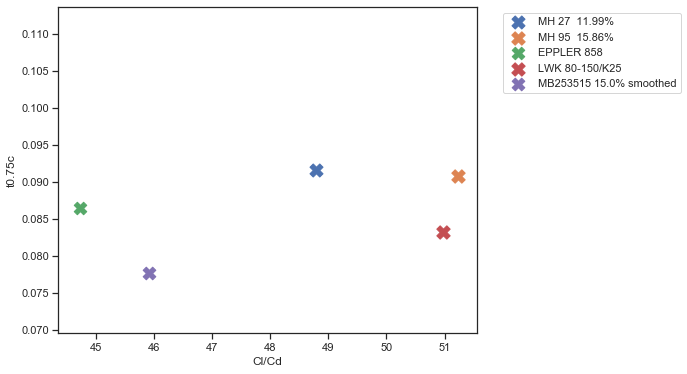

In [16]:
sns.set_theme(style='ticks')
Airfoil_name = st_sort['Airfoils'].tolist()

scale=1.5
plt.figure(figsize=(5*scale,4*scale))

for i in range(len(st_sort)):
    plt.scatter(st_sort['Cl/Cd'][i], st_sort['t0.75c'][i], s=st_sort['Cl/Cd'][i]*3.5, label=Airfoil_name[i], marker='X')

plt.xlabel('Cl/Cd')
plt.ylabel('t0.75c')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

In [17]:
# Define alpha at 0.6
# Two ways test, Thus alpha was devide by 2. alhpa = 0.3 for each side.
# H0=t.mean(), H1 != t.mean()

Z = ((st_sort['t0.75c'].mean()-t['t0.75c'].mean())/(st_sort['t0.75c'].mean()*np.sqrt(st_sort['t0.75c'].count()))).round(6)

if -0.52 < Z < 0.52: # @alpha=0.3 Z = 0.52
    print(f'Z = {Z}')
    print('Accept H0 @alpha=0.6: Airfoils are thick')
else:
    print(f'Z = {Z}')
    print('Reject H0 @alpha=0.6: Airfoils are thin')

Z = -0.042723
Accept H0 @alpha=0.6: Airfoils are thick
